# **Lista 1** 💻

1.
https://www.jdoodle.com/online-java-compiler/

```
public class RaizBabilonica {
    public static double raizBabilonica(double n, double err) {
        double x = n,  y = 1;
        while (Math.abs(x - y) > err) {
            x = (x + y) / 2;
            y = n / x;
        }
        return x;
    }

    public static void main(String[] args) {
        System.out.println(raizBabilonica(10, 1e-6));
    }
}
```



2.

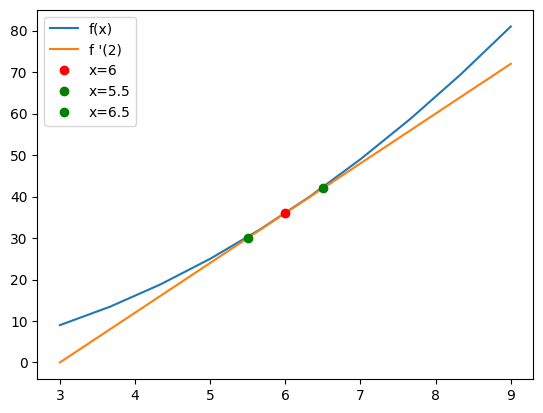

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2

def f_trasso(x):
    h = 0.0001
    return (f(x+h) - f(x)) / h

a = 6
x = np.linspace(3, 9,10)
y = f(x)

tangent_line = f(a) + f_trasso(a) * (x - a)
x_left = a - 0.5
x_right = a + 0.5
y_left = f(a) + f_trasso(a) * (x_left - a)
y_right = f(a) + f_trasso(a) * (x_right - a)


plt.plot(x, y, label='f(x)')
plt.plot(x, tangent_line, label='f \'(2)')
plt.plot(a, f(a), 'ro', label='x='+str(a))
plt.plot(x_left, y_left, 'go', label='x='+str(x_left))
plt.plot(x_right, y_right, 'go', label='x='+str(x_right))

plt.legend()
plt.show()

3.

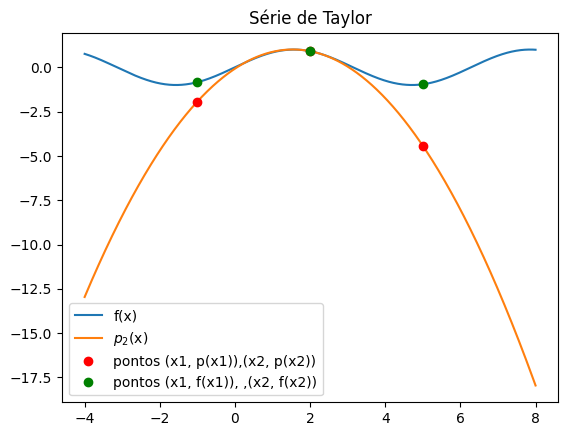

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def f_linha(x):
    return np.cos(x)

def f_2_linha(x):
    return -np.sin(x)

def taylor(a, x):
    return f(a) + f_linha(a)*(x-a) + f_2_linha(a)*((x-a)**2)/2

a = 2
x = np.linspace(-4, 8, 1000)
x_left = a - 3
x_right = a + 3

taylor_poly = taylor(a, x)
p_left = taylor(a, x_left)
p_right = taylor(a, x_right)

fig, ax = plt.subplots()

ax.plot(x, f(x), label='f(x)')
ax.plot(x, taylor_poly, label='$p_{2}$(x)')
ax.plot([x_left, a, x_right], [p_left, f(a), p_right], 'ro', label='pontos (x1, p(x1)),(x2, p(x2))')
ax.plot([x_left, a, x_right], [f(x_left), f(a), f(x_right)], 'go', label='pontos (x1, f(x1)) ,(x2, f(x2))')
ax.legend()
ax.set_title('Série de Taylor')
plt.show()

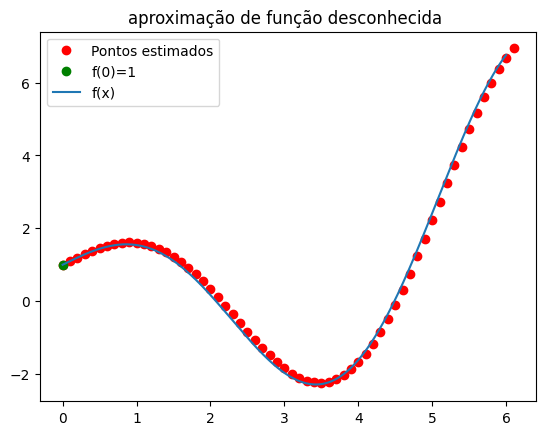

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# função desconhecida 
def f(x):
    return x * np.cos(x) + 1

# derivada
def f_linha(x):
    return np.cos(x) - x * np.sin(x)

# define o ponto conhecido e o intervalo [a,b]
f_0 = 1
a = 0
b = 6

# define h
h = 0.1

# calcula os pontos estimados usando o método de Euler
x = [0]
f_estimado = [f_0]
while x[-1] < b:
    x_novo = x[-1] + h
    f_novo = f_estimado[-1] + f_linha(x[-1]) * h
    x.append(x_novo)
    f_estimado.append(f_novo)

# plota os pontos estimados e o f(0)
x_plot = np.linspace(a, b, 1000)
plt.plot(x, f_estimado, 'ro', label='Pontos estimados')
plt.plot(0, f_0, 'go', label='f(0)=1')

# plota a função desconhecida 
f_plot = f(x_plot)
plt.plot(x_plot, f_plot, label='f(x)')

plt.legend()
plt.title('aproximação de função desconhecida ')

plt.show()
